0
1
2
3
4
5
6
7
8
8 too high!
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
27

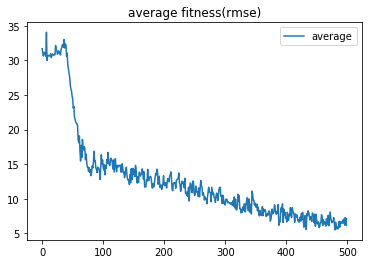

49


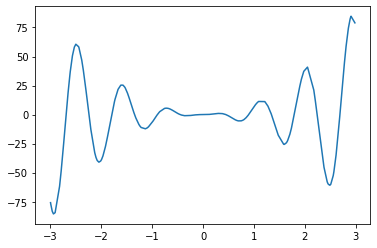

In [3]:

from random import random, randint
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from keras import backend as K





def read_data(filename):
    """Parse problem specifications from the data file."""
    i=0
    data=[]
    data2=[]

    with open(filename, "r") as f:
        # header
        for line in f:
            if i>0:
                iwp = line.strip().split(',')
                new_iwp = list(map(float, iwp))
                data.append(new_iwp[0])
                data2.append(new_iwp[1])  
            i+=1
                
        return data, data2
def add(x, y):
    return x + y
def sin(x):
    return np.sin(x)
def cos(x):
    return np.cos(x)
def sub(x, y):
    return x - y
def mul(x, y):
    return x * y
def exp_1(x) :
    return np.exp(-6*abs(x))+1
def pow1(x):
    return np.power(x,2)
func = [add, sub, mul,sin,cos,pow1,exp_1]
variable=['x']*25
constant=[0.2*(-25+x) for x in range (0,50)]
term =variable+constant
##---------------------------------------Tree algorithm---------
class Node:
    def __init__(self, data = None, left = None, right = None):
        self.data  = data
        self.left  = left
        self.right = right
        
    def build_tree(self, grow, max_depth, depth = 0): 
        if depth < 1 or (depth < max_depth and not grow): 
            self.data = func[randint(0, len(func)-1)]
        elif depth >= max_depth:   
            self.data = term[randint(0, len(term)-1)]
        else:
            if random () > 0.5: 
                self.data = term[randint(0, len(term)-1)]
            else:
                self.data = func[randint(0, len(func)-1)]
        if self.data in [add,sub,mul]:
            self.left = Node()          
            self.left.build_tree(grow, max_depth, depth = depth + 1)            
            self.right = Node()  
            self.right.build_tree(grow, max_depth, depth = depth + 1)
        elif self.data in [sin,cos,pow1,exp_1]:
            if random()>0.5:
                self.left = Node()           
                self.left.build_tree(grow, max_depth, depth = depth + 1)
            else:
                self.right = Node()  
                self.right.build_tree(grow, max_depth, depth = depth + 1)
    def Node_calculate(self, x): 
        if (self.data in [add,sub,mul]): 
            return self.data(self.left.Node_calculate(x), self.right.Node_calculate(x))
        elif (self.data in [sin,cos,pow1,exp_1]):
            if self.left:
                return self.data(self.left.Node_calculate(x))
            else:
                return self.data(self.right.Node_calculate(x))
        elif self.data == 'x': return x
        else: return self.data
            
    

    

    def size(self): # 트리 사이즈
        if self.data in term: return 1
        l = self.left.size()  if self.left  else 0
        r = self.right.size() if self.right else 0
        return 1 + l + r

    def copy_subtree(self): 
        n = Node()  
        n.data = self.data
        if self.left:  n.left  = self.left.copy_subtree()
        if self.right: n.right = self.right.copy_subtree()
        return n
    def depth(self):
        l = self.left.depth() if self.left else 0
        r = self.right.depth() if self.right else 0
        if(r > l):
            return r + 1
        else:
            return l + 1
                                       
    def copy_tree(self, count, second): ##crossover시에 일부 트리를 생성하기 위한 코드
        count[0] -= 1            
        if count[0] <= 1: 
            if not second: 
                return self.copy_subtree()
            else: 
                self.data  = second.data
                self.left  = second.left
                self.right = second.right
        else:  
            ret = None              
            if self.left  and count[0] > 1: ret = self.left.copy_tree(count, second)  
            if self.right and count[0] > 1: ret = self.right.copy_tree(count, second)  
            return ret
    def labeling(self): 
        if (self.data in term):
            return str(self.data)
        else: 
            return self.data.__name__
    def mutation(self):
        if random() < 0.1:
            if self.depth()>10:
                if self.data in func:
                    self.data = func[randint(0, len(func)-1)]
                else:
                    self.data = term[randint(0, len(func)-1)]
            else:
                self.build_tree(grow = True, max_depth = 1)
        elif self.left: self.left.mutation()
        elif self.right: self.right.mutation() 
    
## ------------------------GA algorithm-------------------------------    

def shuffling(X,Y):
    new_list_1= list(range(0,500))
    new_list_2=list(range(0,500))
    idx = np.arange(500)
    np.random.shuffle(idx)
    for i in range(500):
        new_list_1[i]=deepcopy(X[idx[i]])
        new_list_2[i]=deepcopy(Y[idx[i]])
    return new_list_1,new_list_2                      
def sorting(X,Y):
    
    B=sorted(Y)

    A=[]
    for n in range(len(X)):
    
        for m in range(len(X)):
            if B[n]==Y[m]:

                A.append(X[m])
                break
    
    return A,B   
def initialize():
    
    pop = []
    for i in range(500):
        n=Node()  
        Node_depth=randint(3,5)
        if random()>0.5:
            n.build_tree(grow = True, max_depth = Node_depth)
        else:
            n.build_tree(grow = False, max_depth = Node_depth)
        pop.append(n)
    return pop

def fitness_function(individual,dataset): ##RMSE + 깊이가 12가 넘으면 패널티
    pred=[]
    true=[]
    for i in range(200):
        pred.append(individual.Node_calculate(dataset[0][i]))
        true.append(dataset[1][i])
    RMSE=np.sqrt(np.square(np.subtract(pred,true)).mean())
    if individual.depth()>12:
        RMSE+=10
    return RMSE  
    
                
def selection(population, fitness): 
    new_fitness=list(range(0,500))
    new_population=list(range(0,500))
    for i in range(500):
        z=randint(0,499)
        if fitness[i]>fitness[z]:
            new_population[i]=deepcopy(population[z])
            new_fitness[i]=deepcopy(fitness[z])
        else:
            new_population[i]=deepcopy(population[i])
            new_fitness[i]=deepcopy(fitness[i])
    return new_population,new_fitness
def crossover(population):
    for i in range (0,250):
        if np.random.rand()<0.8: 
            randnum1=randint(1,population[i].size())
            randnum2=randint(1,population[i+250].size())
            aux = population[i].copy_tree([randnum1], None)
            aux2 = population[i+250].copy_tree([randnum2], None)
            population[i].copy_tree([randnum1], aux2)
            population[i+250].copy_tree([randnum2], aux)           
def preorder(node,gap = ""):## 전위순회로 트리구조 프린트
    
    if node:
        print("%s%s" % (gap,node.labeling()))
        preorder(node.left,gap+"  ")
        preorder(node.right,gap+"  ")
def visualize (data1):    
    plt.title("average fitness(rmse)")
    plt.plot(range(500), data1, label="average")
    plt.legend()
    plt.show()
##---------------------------------------------------Main---------------------------------------------    
if __name__== "__main__":
    filename = 'data-gp1.txt'
    filename2 = 'data-gp2.txt'
    x,y=read_data(filename)
    dataset=(x,y)
    population= initialize() 
    population2=initialize()
    best_individual = None
    best_fitness = 100

    fitness=list(range(0,500))
    history=list(range(0,500))
    for p in range(500):
        fitness[p]=fitness_function(population[p],dataset)
    
    for g in range(500):
        print(g)
        population,fitness=sorting(population,fitness)
        for k in range(int(g/5)): ## Elitism with increasing portion
            population2[k]=deepcopy(population[k])
        population,fitness=selection(population,fitness)
        population,fitness=shuffling(population,fitness)
        crossover(population)
        for i in range(500):
            population[i].mutation
            
        for p in range(500):
            fitness[p]=fitness_function(population[p],dataset)
        population,fitness=sorting(population,fitness)
        for k in range(int(g/5),500):
            population2[k]=population[k-(int(g/5))]
        population=deepcopy(population2)
       
        for p in range(500):
            fitness[p]=fitness_function(population[p],dataset)
        history[g]=sum(fitness)/len(fitness)
        if history[g]>50:
            print(g,"too high!")
            history[g]=30
    
        if min(fitness) < best_fitness:
            best_fitness = min(fitness)
            
            best_individual = deepcopy(population[fitness.index(min(fitness))])
    preorder(best_individual)
    print(min(fitness))
    
    visualize(history)
    y,x=sorting(y,x)
    a=[]
    for i in range(200):
        a.append(best_individual.Node_calculate(x[i]))
    plt.plot(x,a)
    plt.show
    print(best_individual.size())

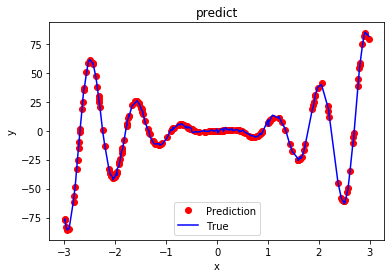

In [7]:

plt.plot(x,a, 'ro', label='Prediction')

plt.plot(x,y ,'b', label='True')
plt.title('predict')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [6]:
 print(best_individual.depth())

12


In [10]:
for i in range (500):
    if population[i].depth()>12:
        fitness[i]-=10
print(sum(fitness)/len(fitness))

6.09061986271551


In [19]:
u=0
for i in range(500):
    u+=population[i].depth()
print(u/500)

11.654


In [22]:
 print(best_individual.size())

49


In [23]:
print(best_individual.depth())

12
